# Trabalho Prático

## Linear Regression Project

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix
import re
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier




# Read Dataset

In [41]:
train = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

# Data Preparation

In [42]:
print(len(test))
print(len(train))

1206
5000


### Remove City Column

In [43]:
citiesValues = train.groupby(['city_name'])['city_name'].count()
print(citiesValues)

city_name
Guimaraes    5000
Name: city_name, dtype: int64


In [44]:
train = train.drop(['city_name'],axis=1)
test = test.drop(['city_name'],axis=1)


### Magnitude of delay treatment

In [45]:
magnitude = train.groupby(['magnitude_of_delay'])['magnitude_of_delay'].count()
test.groupby(['magnitude_of_delay'])['magnitude_of_delay'].count()
print(magnitude)

magnitude_of_delay
MAJOR         678
MODERATE        8
UNDEFINED    4314
Name: magnitude_of_delay, dtype: int64


In [46]:
train = train.drop(['magnitude_of_delay'],axis=1)
test = test.drop(['magnitude_of_delay'],axis=1)

### Delay in Seconds

In [47]:
# def absolute_maximum_scale(series):
#     return series / series.abs().max()


# train['delay_in_seconds'] = absolute_maximum_scale(train['delay_in_seconds'])
# test['delay_in_seconds'] = absolute_maximum_scale(test['delay_in_seconds'])


### Avg_Precipitaion

In [48]:
precipitation = train.groupby(['avg_precipitation'])['avg_precipitation'].count()
print(precipitation)

train = train.drop(['avg_precipitation'],axis=1)
test = test.drop(['avg_precipitation'],axis=1)

avg_precipitation
0.0    5000
Name: avg_precipitation, dtype: int64


### Label Enconding

In [49]:
luminosity_values = train.groupby(['luminosity'])['luminosity'].count()
print(luminosity_values)

rain_values = train.groupby(['avg_rain'])['avg_rain'].count()
print(rain_values)

label_encoder = preprocessing.LabelEncoder()
train['luminosity'] = label_encoder.fit_transform(train['luminosity'])
train['avg_rain'] = label_encoder.fit_transform(train['avg_rain'])
# train['delay_in_seconds'] = label_encoder.fit_transform(train['delay_in_seconds'])



test['avg_rain'] = label_encoder.fit_transform(test['avg_rain'])
test['luminosity'] = label_encoder.fit_transform(test['luminosity'])
# test['delay_in_seconds'] = label_encoder.fit_transform(test['delay_in_seconds'])


luminosity
DARK         2489
LIGHT        2325
LOW_LIGHT     186
Name: luminosity, dtype: int64
avg_rain
Sem Chuva         4756
chuva forte          3
chuva fraca        214
chuva moderada      27
Name: avg_rain, dtype: int64


### Affected Roads

In [50]:
roads = train.groupby(['affected_roads'])['affected_roads'].count()

def hotLabelEncoding(dataset):
    dict = {}
    dict['total_estradas'] = []
        
    columns = dataset['affected_roads']

    for column in columns:
        if (column != '' and isinstance(column, str) ):
            roadList = column.split(",")
            for road in roadList:
                if (road != '' and road != 'nan' and road != 'IC5 - N206' and road != 'N101 - N310' and road != 'N207-4'):
                    dict[road] = []
                    
    
    for line in dataset['affected_roads']:
        if (line != '' and isinstance(line, str) ):
            count = 0
            total_count = 0
            for road in dict.keys() :
                if(road != 'total_estradas'):
                    count = line.count(road)
                    total_count = total_count + count
                    dict[road].append(count)
            dict['total_estradas'].append(total_count)
        else:
            for road in dict.keys():
                dict[road].append(0)


    for road in sorted(dict.keys(), key=lambda x:x.lower()):
        if road == 'total_estradas':
             dataset[road] = dict[road]
    

hotLabelEncoding(dataset=train)
hotLabelEncoding(dataset=test)


train = train.drop(['affected_roads'],axis=1)
test = test.drop(['affected_roads'],axis=1)







### Data and hour treatment

In [51]:
# separate collumn Date 
def separate_year(time):
    res = re.search(r'(\d+)-(\d+)-(\d+) (\d+):(\d+)', time)
    if res:
        return int(res.group(1))

def separate_month(time):
    res = re.search(r'(\d+)-(\d+)-(\d+) (\d+):(\d+)', time)
    if res:
        return int(res.group(2))
    
def separate_day(time):
    res = re.search(r'(\d+)-(\d+)-(\d+) (\d+):(\d+)', time)
    if res:
        return int(res.group(3))
    
def separate_hour(time):
    res = re.search(r'(\d+)-(\d+)-(\d+) (\d+):(\d+)', time)
    if res:
        return int(res.group(4))
        
def separate_minutes(time):
    res = re.search(r'(\d+)-(\d+)-(\d+) (\d+):(\d+)', time)
    if res:
        return int(res.group(5))
    
train['Year'] = train['record_date'].apply(separate_year)
train['Month'] = train['record_date'].apply(separate_month)
train['Day'] = train['record_date'].apply(separate_day)
train['Hour'] = train['record_date'].apply(separate_hour)
train['Minutes'] = train['record_date'].apply(separate_minutes)
minutes_values = train.groupby(['Minutes'])['Minutes'].count()
print(minutes_values)

train = train.drop(['record_date'],axis=1)


test['Year'] = test['record_date'].apply(separate_year)
test['Month'] = test['record_date'].apply(separate_month)
test['Day'] = test['record_date'].apply(separate_day)
test['Hour'] = test['record_date'].apply(separate_hour)
test['Minutes'] = test['record_date'].apply(separate_minutes)
test = test.drop(['record_date'],axis=1)

test = test.drop(['Minutes'],axis=1)
train = train.drop(['Minutes'],axis=1)

test = test.drop(['Year'],axis=1)
train = train.drop(['Year'],axis=1)



Minutes
0    5000
Name: Minutes, dtype: int64


# Data Vizualization

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   delay_in_seconds  5000 non-null   int64  
 1   luminosity        5000 non-null   int64  
 2   avg_temperature   5000 non-null   float64
 3   avg_atm_pressure  5000 non-null   float64
 4   avg_humidity      5000 non-null   float64
 5   avg_wind_speed    5000 non-null   float64
 6   avg_rain          5000 non-null   int64  
 7   incidents         5000 non-null   object 
 8   total_estradas    5000 non-null   int64  
 9   Month             5000 non-null   int64  
 10  Day               5000 non-null   int64  
 11  Hour              5000 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 468.9+ KB


### Média estradas afetadas por gravidade de incidente

<AxesSubplot:xlabel='incidents', ylabel='total_estradas'>

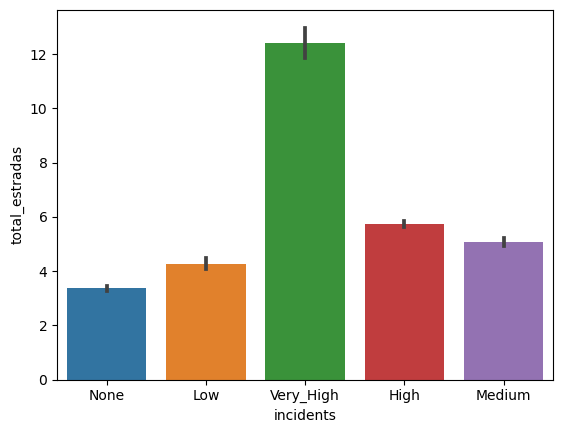

In [53]:

sns.barplot(data=train, x="incidents", y="total_estradas")

### Hora com mais incidentes

<AxesSubplot:xlabel='Hour', ylabel='Count'>

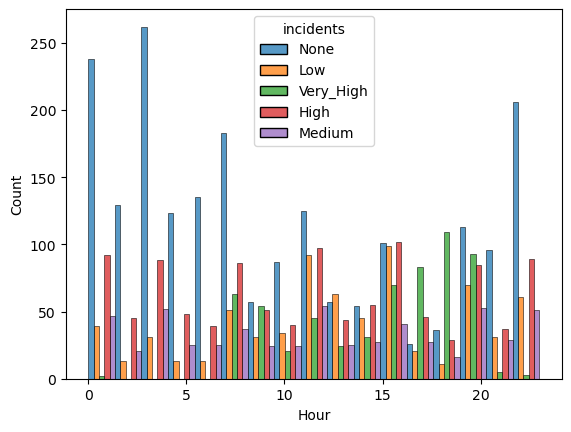

In [63]:
sns.histplot(data=train, x="Hour", hue="incidents", multiple="dodge")

### Mês com mais incidentes

<AxesSubplot:xlabel='Month', ylabel='Count'>

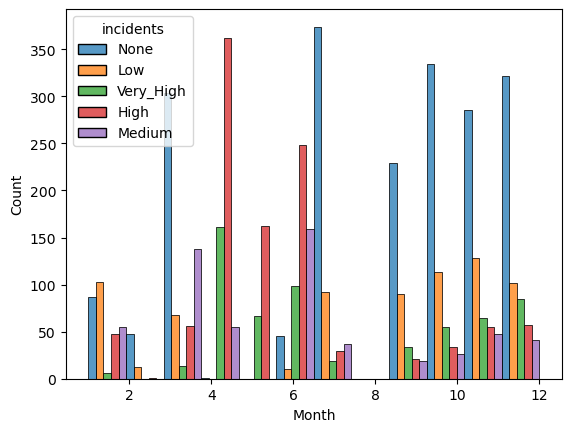

In [66]:
sns.histplot(data=train, x="Month", hue="incidents", multiple="dodge")

### Delay pelo número de estradas afetadas

In [ ]:
sns.lineplot(data=train, x="total_estradas", y="delay_in_seconds")

### Correlation Matrix

<AxesSubplot:>

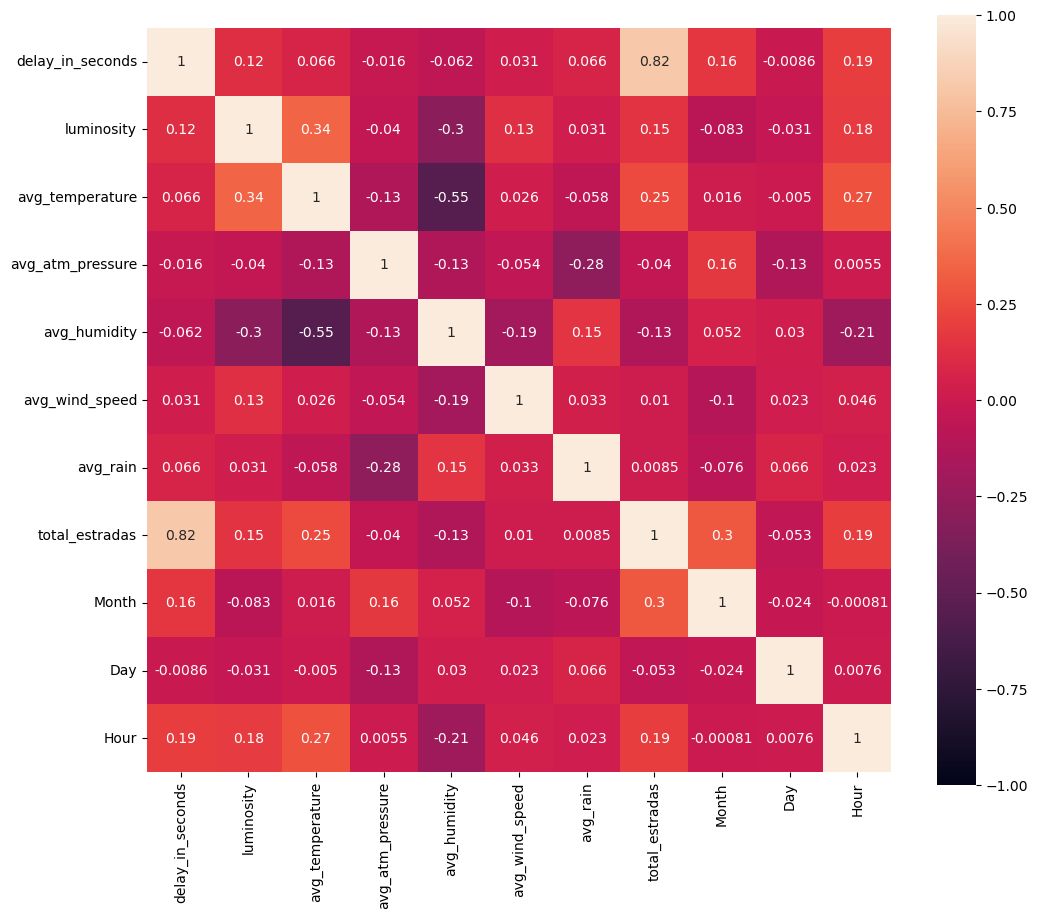

In [54]:
corr_matrix = train.corr()
f , ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

# Model


In [55]:


X = train.drop(['incidents'], axis=1)
y = train['incidents']

X.to_csv('X.csv')


x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(X,y, test_size=0.3, random_state=2022)   # using 30% for testing and 70% for training


### Logistic Classification




Score with train data: 0.7286666666666667




/home/saraiva/anaconda3/envs/daa/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


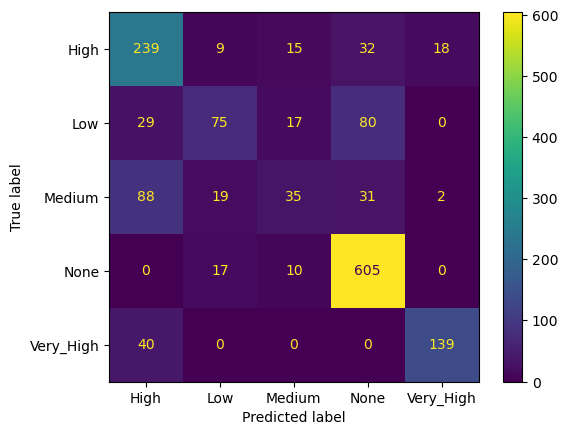

In [56]:
# vamos entao dar fit nos dados de treino e prever com os de teste
lg = LogisticRegression(max_iter=100000,random_state=2022)
lg.fit(x_train, y_train)    #eventualmente podemos mudar o solver!
predictions = lg.predict(x_test)
score = lg.score(x_test, y_test)
print('\n\n\nScore with train data: ' + str(score) + '\n\n')
plot_confusion_matrix(lg, x_test, y_test)

### Random Forest

Accuracy: 0.9226666666666666


/home/saraiva/anaconda3/envs/daa/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


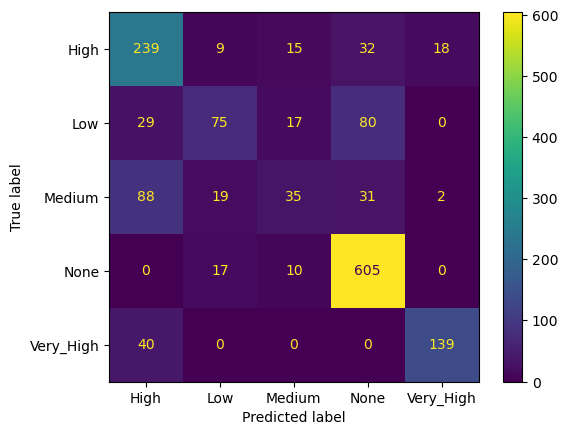

In [57]:


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000, random_state=2022)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(lg, x_test, y_test)


0:	learn: 0.8561750	total: 2.11ms	remaining: 1.48s
1:	learn: 0.7405860	total: 4.27ms	remaining: 1.49s
2:	learn: 0.6665688	total: 6.58ms	remaining: 1.53s
3:	learn: 0.6319968	total: 8.56ms	remaining: 1.49s
4:	learn: 0.5984071	total: 10.2ms	remaining: 1.41s
5:	learn: 0.5271624	total: 11.7ms	remaining: 1.35s
6:	learn: 0.5049164	total: 13.2ms	remaining: 1.31s
7:	learn: 0.4689370	total: 15.5ms	remaining: 1.34s
8:	learn: 0.4590407	total: 17.3ms	remaining: 1.32s
9:	learn: 0.4414941	total: 19.3ms	remaining: 1.33s
10:	learn: 0.4347556	total: 20.9ms	remaining: 1.31s
11:	learn: 0.4131109	total: 22.5ms	remaining: 1.29s
12:	learn: 0.4039160	total: 24.5ms	remaining: 1.3s
13:	learn: 0.3904874	total: 26.6ms	remaining: 1.3s
14:	learn: 0.3702330	total: 28.7ms	remaining: 1.31s
15:	learn: 0.3376967	total: 31.1ms	remaining: 1.33s
16:	learn: 0.3356386	total: 33.2ms	remaining: 1.33s
17:	learn: 0.3196394	total: 34.6ms	remaining: 1.31s
18:	learn: 0.3179914	total: 36.2ms	remaining: 1.3s
19:	learn: 0.3137100	tota

/home/saraiva/anaconda3/envs/daa/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


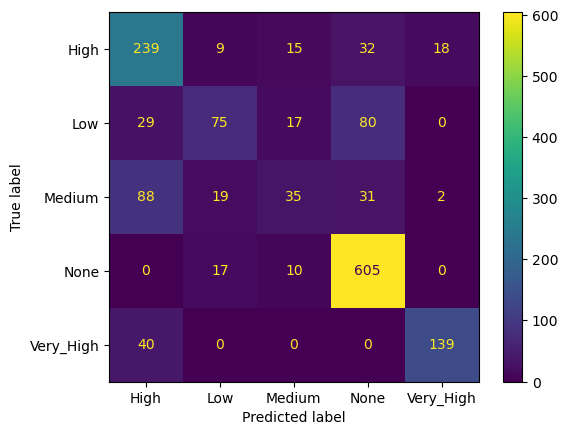

In [58]:

from catboost import CatBoostClassifier


model = CatBoostClassifier(iterations=700,
                          learning_rate=1,
                          depth=4,
                          random_state=2022)
# Fit model
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
# Get predictions
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(lg, x_test, y_test)


Accuracy: 0.9306666666666666


/home/saraiva/anaconda3/envs/daa/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


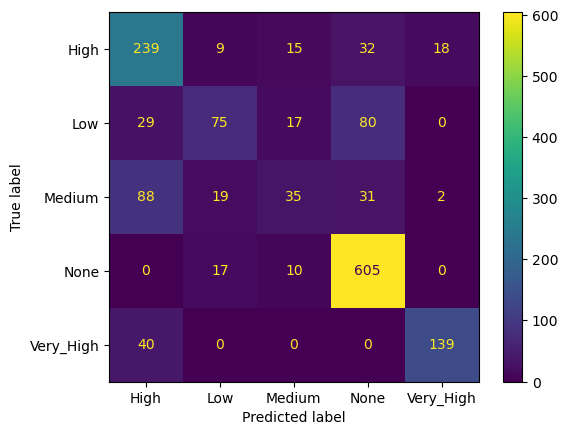

In [59]:
base_cls = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = 1000,
                          random_state = 2022,
                          max_samples = 0.7)


model.fit(x_train,y_train)

y_pred = model.predict(x_test)

# Get predictions

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(lg, x_test, y_test)

predictions = model.predict(test)




res = pd.DataFrame(data={'RowId': range(1,1207), 'Incidents': predictions})
res.to_csv('res.csv', index=False)
